# Configuration
A sample of the best configuration for the job

In [1]:
import matplotlib.pyplot as plt

import gym_duckietown
import gym

from IPython import display as ipythondisplay

DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:duckietown_world:duckietown-world version 6.2.38 path /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages
DEBUG:geometry:PyGeometry-z6 version 2.1.4 path /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages
DEBUG:aido_schemas:aido-protocols version 6.0.59 path /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages
DEBUG:nodes:version 6.2.13 path /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages pyparsing 3.0.6
DEBUG:gym-duckietown:gym-duckietown version 6.1.30 path /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages



{'audio': ('xaudio2', 'directsound', 'openal', 'pulse', 'silent'), 'debug_font': False, 'debug_gl': True, 'debug_gl_trace': False, 'debug_gl_trace_args': False, 'debug_graphics_batch': False, 'debug_lib': False, 'debug_media': False, 'debug_texture': False, 'debug_trace': False, 'debug_trace_args': False, 'debug_trace_depth': 1, 'debug_trace_flush': True, 'debug_win32': False, 'debug_x11': False, 'graphics_vbo': True, 'shadow_window': True, 'vsync': None, 'xsync': True, 'xlib_fullscreen_override_redirect': False, 'darwin_cocoa': True, 'search_local_libs': True, 'advanced_font_features': False, 'headless': False, 'headless_device': 0}


In [2]:
#gym_duckietown is very chatty
import logging
gym_duckietown.logger.setLevel(logging.WARNING)

In [3]:
env = gym.make("Duckietown-small_loop-v0",
    full_transparency=True,
    domain_rand=False,
    user_tile_start=[1,2],
    seed=42,
    max_steps=2000,
)

INFO:duckietown_world: data: /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages/duckietown_world/data
/home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [4]:
env.unwrapped.start_pose = [[0.7019999027252197, 0, 0.41029359288296474], 3.1415]

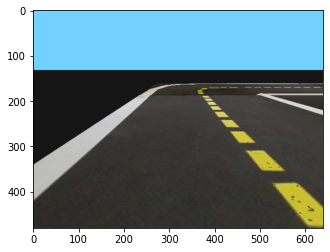

In [5]:
plt.imshow(env.reset())

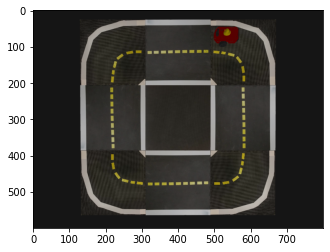

In [6]:
plt.imshow(env.render(mode="top_down"))

In [7]:
env.get_agent_info()

{'Simulator': {'action': [0, 0],
  'lane_position': {'dist': -0.24769308130849313,
   'dot_dir': 0.9737335096565546,
   'angle_deg': 13.161151278616984,
   'angle_rad': 0.22970542316492795},
  'robot_speed': 0.0,
  'proximity_penalty': 0,
  'cur_pos': [1.2869999027252197, 0.0, 1.5802935928829647],
  'cur_angle': 3.1415,
  'wheel_velocities': [0, 0],
  'timestamp': 0.0,
  'tile_coords': [2, 2]}}

### Cartesian dimensions

In [8]:
f"From (0,0) to {(env.grid_height*env.road_tile_size, env.grid_width*env.road_tile_size)}"

'From (0,0) to (1.755, 1.755)'

In [9]:
#From line 1586 circa
p = env.cartesian_from_weird(env.cur_pos, env.cur_angle)
p

array([[-9.99999996e-01, -9.26535897e-05,  1.28699990e+00],
       [ 9.26535897e-05, -9.99999996e-01,  1.74706407e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

## Test drive

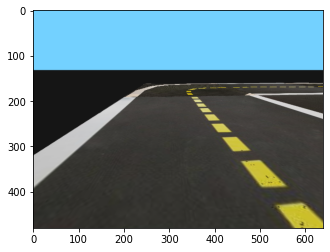

In [10]:
env.reset()
for i in range(10):

    lane_pose = env.get_lane_pos2(env.cur_pos, env.cur_angle)
    distance_to_road_center = lane_pose.dist
    angle_from_straight_in_rads = lane_pose.angle_rad
    
    k_p = 10
    k_d = 1
    speed = 0.5 
    steering = k_p*distance_to_road_center + k_d*angle_from_straight_in_rads
    
    obs, reward, done, info = env.step([speed, steering])
    plt.imshow(obs)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    if done:
        break
ipythondisplay.clear_output(wait=True)